# Reverse the whole of AR6

In [1]:
import pyam
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import silicone.database_crunchers as dc
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

<IPython.core.display.Javascript object>

# Import the whole of AR6 and classify it according to our criteria

In [2]:
ar6 = pyam.IamDataFrame("../input/AR6_Scenarios_Database_World_v1.0.csv")

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file ..\input\AR6_Scenarios_Database_World_v1.0.csv


In [3]:
ar6.load_meta("../input/AR6_Scenarios_Database_metadata_indicators_v1.0.xlsx")

pyam.core - WARNING: Reading meta indicators for 2298 out of 2430 scenarios, ignoring 6 scenarios from file


In [4]:
temp = "AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|50.0th Percentile"
co2 = "Emissions|CO2"
ch4 = "Emissions|CH4"
years = np.arange(2010, 2101, 5)

In [5]:
ar6.meta

Category  \
model             scenario                                                      
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                                  NaN   
                  ADVANCE_2020_Med2C                                      NaN   
                  ADVANCE_2020_WB2C                                       NaN   
                  ADVANCE_2030_Med2C                                      NaN   
                  ADVANCE_2030_Price1.5C                                  NaN   
...                                                                       ...   
TIAM-Grantham 1.0 AdvTech, Low Dem, PE off (V4) CO2 price $200 (5...      NaN   
                  AdvTech, Low Dem, PE off (V4) CO2 price $250 (5...      NaN   
WITCH 5.0         EN_INDCi2030_700                                        NaN   
                  EN_NPi2020_300f                                         NaN   
                  EN_NPi2020_400                                          NaN   

                                                                     Category_name  \
model             scenario                                                           
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                                       NaN   
                  ADVANCE_2020_Med2C                                           NaN   
                  ADVANCE_2020_WB2C                                            NaN   
                  ADVANCE_2030_Med2C                                           NaN   
                  ADVANCE_2030_Price1.5C                                       NaN   
...                                                                            ...   
TIAM-Grantham 1.0 AdvTech, Low Dem, PE off (V4) CO2 price $200 (5...           NaN   
                  AdvTech, Low Dem, PE off (V4) CO2 price $250 (5...           NaN   
WITCH 5.0         EN_INDCi2030_700                                             NaN   
                  EN_NPi2020_300f                                              NaN   
                  EN_NPi2020_400                                               NaN   

                                                                     Category_subset  \
model             scenario                                                             
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                                  C1a_NZGHGs   
                  ADVANCE_2020_Med2C                                              C4   
                  ADVANCE_2020_WB2C                                      C1b_+veGHGs   
                  ADVANCE_2030_Med2C                                              C4   
                  ADVANCE_2030_Price1.5C                                          C2   
...                                                                              ...   
TIAM-Grantham 1.0 AdvTech, Low Dem, PE off (V4) CO2 price $200 (5...             NaN   
                  AdvTech, Low Dem, PE off (V4) CO2 price $250 (5...             NaN   
WITCH 5.0         EN_INDCi2030_700                                               NaN   
                  EN_NPi2020_300f                                                NaN   
                  EN_NPi2020_400                                                 NaN   

                                                                     Subset_Ch4  \
model             scenario                                                        
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                                    NaN   
                  ADVANCE_2020_Med2C                                        NaN   
                  ADVANCE_2020_WB2C                                         NaN   
                  ADVANCE_2030_Med2C                                        NaN   
                  ADVANCE_2030_Price1.5C                                    NaN   
...                                                                         ...   
TIAM-Grantham 1.0 AdvTech, Low Dem, PE off (V4) CO2 price $200 (5...        NaN   
    

In [6]:
ar6.set_meta_from_data("Has_temp", variable=temp, method=len)
ar6.meta

Category  \
model             scenario                                                      
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                                  NaN   
                  ADVANCE_2020_Med2C                                      NaN   
                  ADVANCE_2020_WB2C                                       NaN   
                  ADVANCE_2030_Med2C                                      NaN   
                  ADVANCE_2030_Price1.5C                                  NaN   
...                                                                       ...   
TIAM-Grantham 1.0 AdvTech, Low Dem, PE off (V4) CO2 price $200 (5...      NaN   
                  AdvTech, Low Dem, PE off (V4) CO2 price $250 (5...      NaN   
WITCH 5.0         EN_INDCi2030_700                                        NaN   
                  EN_NPi2020_300f                                         NaN   
                  EN_NPi2020_400                                          NaN   

                                                                     Category_name  \
model             scenario                                                           
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                                       NaN   
                  ADVANCE_2020_Med2C                                           NaN   
                  ADVANCE_2020_WB2C                                            NaN   
                  ADVANCE_2030_Med2C                                           NaN   
                  ADVANCE_2030_Price1.5C                                       NaN   
...                                                                            ...   
TIAM-Grantham 1.0 AdvTech, Low Dem, PE off (V4) CO2 price $200 (5...           NaN   
                  AdvTech, Low Dem, PE off (V4) CO2 price $250 (5...           NaN   
WITCH 5.0         EN_INDCi2030_700                                             NaN   
                  EN_NPi2020_300f                                              NaN   
                  EN_NPi2020_400                                               NaN   

                                                                     Category_subset  \
model             scenario                                                             
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                                  C1a_NZGHGs   
                  ADVANCE_2020_Med2C                                              C4   
                  ADVANCE_2020_WB2C                                      C1b_+veGHGs   
                  ADVANCE_2030_Med2C                                              C4   
                  ADVANCE_2030_Price1.5C                                          C2   
...                                                                              ...   
TIAM-Grantham 1.0 AdvTech, Low Dem, PE off (V4) CO2 price $200 (5...             NaN   
                  AdvTech, Low Dem, PE off (V4) CO2 price $250 (5...             NaN   
WITCH 5.0         EN_INDCi2030_700                                               NaN   
                  EN_NPi2020_300f                                                NaN   
                  EN_NPi2020_400                                                 NaN   

                                                                     Subset_Ch4  \
model             scenario                                                        
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                                    NaN   
                  ADVANCE_2020_Med2C                                        NaN   
                  ADVANCE_2020_WB2C                                         NaN   
                  ADVANCE_2030_Med2C                                        NaN   
                  ADVANCE_2030_Price1.5C                                    NaN   
...                                                                         ...   
TIAM-Grantham 1.0 AdvTech, Low Dem, PE off (V4) CO2 price $200 (5...        NaN   
    

In [7]:
assert len(ar6.meta["Has_temp"].drop_duplicates()) == 2
ar6.meta["Has_temp"].drop_duplicates()

model        scenario              
AIM/CGE 2.0  ADVANCE_2020_1.5C-2100    106.0
AIM/CGE 2.1  CO_2Deg2020                 NaN
Name: Has_temp, dtype: float64

In [8]:
tempcount = ar6.meta["Has_temp"].drop_duplicates()[0]

In [9]:
valid_temps_ar6 = ar6.filter(
    Has_temp=tempcount, variable=["Emissions|*", "*Surface Temperature (GSAT)|FaIRv1.6.2|*"], year=years
)

In [10]:
co2times = ar6.filter(variable=co2, Has_temp=tempcount, year=years).interpolate(years[1:-1])
co2timests = co2times.timeseries()

In [11]:
nzyear = "Year of netzero CO2 emissions (Harm-Infilled) table"
co2times.meta[nzyear]

model              scenario              
AIM/CGE 2.0        ADVANCE_2020_1.5C-2100    2044.0
                   ADVANCE_2020_Med2C           NaN
                   ADVANCE_2020_WB2C         2059.0
                   ADVANCE_2030_Med2C           NaN
                   ADVANCE_2030_Price1.5C    2047.0
                                              ...  
WITCH-GLOBIOM 4.4  CD-LINKS_NPi                 NaN
                   CD-LINKS_NPi2020_1000     2076.0
                   CD-LINKS_NPi2020_1600     2095.0
                   CD-LINKS_NPi2020_400      2055.0
                   CD-LINKS_NoPolicy            NaN
Name: Year of netzero CO2 emissions (Harm-Infilled) table, Length: 1682, dtype: float64

In [12]:
co22030rat = co2timests[2030] / co2timests[2020]
co22030rat.index = co22030rat.index.droplevel(["variable", "unit", "region"])
co22030rat.name = "factor2030"
co22030rat

model              scenario              
AIM/CGE 2.0        ADVANCE_2020_1.5C-2100    0.480011
                   ADVANCE_2020_Med2C        0.543255
                   ADVANCE_2020_WB2C         0.543425
                   ADVANCE_2030_Med2C        0.945143
                   ADVANCE_2030_Price1.5C    0.936908
                                               ...   
WITCH-GLOBIOM 4.4  CD-LINKS_NPi              1.251842
                   CD-LINKS_NPi2020_1000     0.510759
                   CD-LINKS_NPi2020_1600     0.717518
                   CD-LINKS_NPi2020_400      0.379542
                   CD-LINKS_NoPolicy         1.229468
Name: factor2030, Length: 1682, dtype: float64

In [13]:
minco2 = co2timests.min(axis=1)
minco2.name = "overshoot"
minco2.index = minco2.index.droplevel(["variable", "unit", "region"])
minco2

model              scenario              
AIM/CGE 2.0        ADVANCE_2020_1.5C-2100    -9964.356400
                   ADVANCE_2020_Med2C         7758.438200
                   ADVANCE_2020_WB2C         -2459.894600
                   ADVANCE_2030_Med2C         5286.630300
                   ADVANCE_2030_Price1.5C    -7435.738600
                                                 ...     
WITCH-GLOBIOM 4.4  CD-LINKS_NPi              35674.120803
                   CD-LINKS_NPi2020_1000     -8298.142767
                   CD-LINKS_NPi2020_1600     -1964.924847
                   CD-LINKS_NPi2020_400     -14723.049290
                   CD-LINKS_NoPolicy         35674.120803
Name: overshoot, Length: 1682, dtype: float64

In [14]:
np.isfinite(co2timests).sum()

2010    1625
2015    1682
2020    1682
2025    1682
2030    1682
2035    1682
2040    1682
2045    1682
2050    1682
2055    1682
2060    1682
2065    1682
2070    1682
2075    1682
2080    1682
2085    1682
2090    1682
2095    1682
2100    1682
dtype: int64

In [15]:
methane_dict = {}
methane_error = {}
methane_ts = valid_temps_ar6.filter(variable=ch4).timeseries()
methane_cr = dc.QuantileRollingWindows(valid_temps_ar6)
levels = np.round(np.arange(0.05, 1.0, 0.05), 3)
for level in levels:
    methane_dict[level] = methane_cr.derive_relationship(ch4, [co2], level)(co2times).timeseries()
    methane_error[level] = np.nanmean((methane_dict[level] - methane_ts)**2, axis=1)

C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [16]:
methane_score = pd.DataFrame(methane_error, columns=levels, index=methane_dict[0.5].index)
methane_score

0.05  \
model             scenario               region variable      unit                      
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100 World  Emissions|CH4 Mt CH4/yr    862.965917   
                  ADVANCE_2020_Med2C     World  Emissions|CH4 Mt CH4/yr   5210.464227   
                  ADVANCE_2020_WB2C      World  Emissions|CH4 Mt CH4/yr   2231.004455   
                  ADVANCE_2030_Med2C     World  Emissions|CH4 Mt CH4/yr   5578.038799   
                  ADVANCE_2030_Price1.5C World  Emissions|CH4 Mt CH4/yr   2770.915673   
...                                                                               ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi           World  Emissions|CH4 Mt CH4/yr  39619.092320   
                  CD-LINKS_NPi2020_1000  World  Emissions|CH4 Mt CH4/yr    899.999978   
                  CD-LINKS_NPi2020_1600  World  Emissions|CH4 Mt CH4/yr    909.127115   
                  CD-LINKS_NPi2020_400   World  Emissions|CH4 Mt CH4/yr    907.544149   
                  CD-LINKS_NoPolicy      World  Emissions|CH4 Mt CH4/yr  50559.151136   

                                                                                 0.10  \
model             scenario               region variable      unit                      
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100 World  Emissions|CH4 Mt CH4/yr    603.147716   
                  ADVANCE_2020_Med2C     World  Emissions|CH4 Mt CH4/yr   3701.187546   
                  ADVANCE_2020_WB2C      World  Emissions|CH4 Mt CH4/yr   1156.617144   
                  ADVANCE_2030_Med2C     World  Emissions|CH4 Mt CH4/yr   3678.165610   
                  ADVANCE_2030_Price1.5C World  Emissions|CH4 Mt CH4/yr   1602.911187   
...                                                                               ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi           World  Emissions|CH4 Mt CH4/yr  28577.061122   
                  CD-LINKS_NPi2020_1000  World  Emissions|CH4 Mt CH4/yr    541.921607   
                  CD-LINKS_NPi2020_1600  World  Emissions|CH4 Mt CH4/yr    565.877878   
                  CD-LINKS_NPi2020_400   World  Emissions|CH4 Mt CH4/yr    594.121221   
                  CD-LINKS_NoPolicy      World  Emissions|CH4 Mt CH4/yr  38017.727143   

                                                                                 0.15  \
model             scenario               region variable      unit                      
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100 World  Emissions|CH4 Mt CH4/yr    643.248881   
                  ADVANCE_2020_Med2C     World  Emissions|CH4 Mt CH4/yr   3187.052325   
                  ADVANCE_2020_WB2C      World  Emissions|CH4 Mt CH4/yr    867.094954   
                  ADVANCE_2030_Med2C     World  Emissions|CH4 Mt CH4/yr   2999.404577   
                  ADVANCE_2030_Price1.5C World  Emissions|CH4 Mt CH4/yr   1170.631173   
...                                                                               ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi           World  Emissions|CH4 Mt CH4/yr  21144.213090   
                  CD-LINKS_NPi2020_1000  World  Emissions|CH4 Mt CH4/yr    596.269702   
                  CD-LINKS_NPi2020_1600  World  Emissions|CH4 Mt CH4/yr    669.222170   
                  CD-LINKS_NPi2020_400   World  Emissions|CH4 Mt CH4/yr    693.612663   
                  CD-LINKS_NoPolicy      World  Emissions|CH4 Mt CH4/yr  29302.279299   

                                                                                 0.20  \
model             scenario               region variable      unit                      
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100 World  Emissions|CH4 Mt CH4/yr    790.504663   
                  ADVANCE_2020_Med2C     World  Emissions|CH4 Mt CH4/yr   2784.019879   
                  ADVANCE_2020_WB2C      World  Emissions|CH4 Mt CH4/yr    737.733507   
                  ADVANCE_2030_Med2C     World  Emissions|CH4 Mt CH4/yr   2514.928047   
                  ADVANCE_2030_Price1.5C World  Emissions|CH4 Mt CH4/yr  

In [17]:
methts = methane_score.idxmin(axis=1)
methts.index = methts.index.droplevel(["variable", "unit", "region"])
methts.name = "methane"
methts

model              scenario              
AIM/CGE 2.0        ADVANCE_2020_1.5C-2100    0.10
                   ADVANCE_2020_Med2C        0.50
                   ADVANCE_2020_WB2C         0.35
                   ADVANCE_2030_Med2C        0.55
                   ADVANCE_2030_Price1.5C    0.30
                                             ... 
WITCH-GLOBIOM 4.4  CD-LINKS_NPi              0.45
                   CD-LINKS_NPi2020_1000     0.10
                   CD-LINKS_NPi2020_1600     0.10
                   CD-LINKS_NPi2020_400      0.10
                   CD-LINKS_NoPolicy         0.55
Name: methane, Length: 1682, dtype: float64

In [18]:
valid_temps_ar6.filter(variable="*Temp*").variable

['AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|10.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|16.7th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|33.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|5.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|50.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|67.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|83.3th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|90.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|95.0th Percentile']

In [19]:
nz = "Year of netzero CO2 emissions (Harm-Infilled) table"
temp_basename = "AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|{}th Percentile"
results = []
for percentile in ["10.0", "33.0", "50.0", "67.0", "90.0"]:
    tempts = valid_temps_ar6.filter(variable=temp_basename.format(percentile)).timeseries()
    tempts.index = tempts.index.droplevel(["variable", "unit", "region"])
    tempts["quantile"] = np.float64(percentile) / 100
    results_t = pd.concat([tempts, methts, co2times.meta[nzyear], minco2, co22030rat], axis=1)
    results.append(results_t)
results = pd.concat(results)
results

2010      2015      2020  \
model             scenario                                               
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  0.829593  0.945013  1.052415   
                  ADVANCE_2020_Med2C      0.829593  0.945013  1.052355   
                  ADVANCE_2020_WB2C       0.829593  0.945013  1.052452   
                  ADVANCE_2030_Med2C      0.829593  0.945013  1.052931   
                  ADVANCE_2030_Price1.5C  0.829593  0.945013  1.052959   
...                                            ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi            1.112558  1.266891  1.417933   
                  CD-LINKS_NPi2020_1000   1.112558  1.266891  1.417847   
                  CD-LINKS_NPi2020_1600   1.112558  1.266891  1.417852   
                  CD-LINKS_NPi2020_400    1.112558  1.266891  1.418138   
                  CD-LINKS_NoPolicy       1.112558  1.266891  1.421759   

                                              2025      2030      2035  \
model             scenario                                               
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  1.158696  1.155629  1.147528   
                  ADVANCE_2020_Med2C      1.160971  1.167657  1.176005   
                  ADVANCE_2020_WB2C       1.161197  1.166231  1.169169   
                  ADVANCE_2030_Med2C      1.161108  1.219170  1.292537   
                  ADVANCE_2030_Price1.5C  1.161651  1.221231  1.293259   
...                                            ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi            1.572460  1.688500  1.843170   
                  CD-LINKS_NPi2020_1000   1.583042  1.647222  1.676616   
                  CD-LINKS_NPi2020_1600   1.575398  1.648163  1.716005   
                  CD-LINKS_NPi2020_400    1.588046  1.646055  1.658263   
                  CD-LINKS_NoPolicy       1.580533  1.704375  1.867969   

                                              2040      2045      2050  \
model             scenario                                               
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  1.132919  1.095162  1.081622   
                  ADVANCE_2020_Med2C      1.192991  1.207437  1.249167   
                  ADVANCE_2020_WB2C       1.168084  1.151873  1.165692   
                  ADVANCE_2030_Med2C      1.326514  1.322140  1.342548   
                  ADVANCE_2030_Price1.5C  1.300107  1.268205  1.250079   
...                                            ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi            2.043969  2.252216  2.511598   
                  CD-LINKS_NPi2020_1000   1.706817  1.719573  1.772846   
                  CD-LINKS_NPi2020_1600   1.782165  1.821731  1.898270   
                  CD-LINKS_NPi2020_400    1.669296  1.657997  1.678087   
                  CD-LINKS_NoPolicy       2.079440  2.295300  2.559937   

                                              2055  ...      2080      2085  \
model             scenario                          ...                       
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  1.039401  ...  0.912780  0.891601   
                  ADVANCE_2020_Med2C      1.255286  ...  1.335186  1.362302   
                  ADVANCE_2020_WB2C       1.142718  ...  1.102450  1.110298   
                  ADVANCE_2030_Med2C      1.331490  ...  1.407414  1.436774   
                  ADVANCE_2030_Price1.5C  1.201343  ...  1.110667  1.105885   
...                                            ...  ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi            2.723484  ...  3.788669  4.004075   
                  CD-LINKS_NPi2020_1000   1.791192  ...  1.857061  1.864707   
                  CD-LINKS_NPi2020_1600   1.933999  ...  2.148508  2.172879   
                  CD-LINKS_NPi2020_400    1.659304  ...  1.589258  1.559545   
                  CD-LINKS_NoPolicy       2.776777  ...  3.865393  4.083771   

                                              2090      2095      2100  \
model             scenario                             

In [20]:
results["overshootreduced"] = results["overshoot"] / 10000
results["nzreduced"] = (results[nz] - 2000) / 100
labelcols = ["methane", "factor2030", "overshootreduced", "nzreduced"]

In [21]:
badcols = [nz, "overshoot"]
valid_results = results[np.isfinite(results[nz]) & ~np.isnan(results["methane"])].drop(badcols, axis=1)
valid_results

2010      2015      2020  \
model             scenario                                                
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100   0.829593  0.945013  1.052415   
                  ADVANCE_2020_WB2C        0.829593  0.945013  1.052452   
                  ADVANCE_2030_Price1.5C   0.829593  0.945013  1.052959   
                  ADVANCE_2030_WB2C        0.829593  0.945013  1.052972   
                  EMF30_ClimPolicy         0.829593  0.945013  1.049739   
...                                             ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_INDC2030i_1600  1.112558  1.266891  1.421037   
                  CD-LINKS_NDC2030i_1000   1.112558  1.266891  1.420837   
                  CD-LINKS_NPi2020_1000    1.112558  1.266891  1.417847   
                  CD-LINKS_NPi2020_1600    1.112558  1.266891  1.417852   
                  CD-LINKS_NPi2020_400     1.112558  1.266891  1.418138   

                                               2025      2030      2035  \
model             scenario                                                
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100   1.158696  1.155629  1.147528   
                  ADVANCE_2020_WB2C        1.161197  1.166231  1.169169   
                  ADVANCE_2030_Price1.5C   1.161651  1.221231  1.293259   
                  ADVANCE_2030_WB2C        1.161246  1.220154  1.293962   
                  EMF30_ClimPolicy         1.148171  1.163387  1.179687   
...                                             ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_INDC2030i_1600  1.569524  1.661854  1.779090   
                  CD-LINKS_NDC2030i_1000   1.568781  1.661202  1.783935   
                  CD-LINKS_NPi2020_1000    1.583042  1.647222  1.676616   
                  CD-LINKS_NPi2020_1600    1.575398  1.648163  1.716005   
                  CD-LINKS_NPi2020_400     1.588046  1.646055  1.658263   

                                               2040      2045      2050  \
model             scenario                                                
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100   1.132919  1.095162  1.081622   
                  ADVANCE_2020_WB2C        1.168084  1.151873  1.165692   
                  ADVANCE_2030_Price1.5C   1.300107  1.268205  1.250079   
                  ADVANCE_2030_WB2C        1.326703  1.318774  1.314088   
                  EMF30_ClimPolicy         1.203041  1.211995  1.248548   
...                                             ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_INDC2030i_1600  1.890023  1.945038  2.012568   
                  CD-LINKS_NDC2030i_1000   1.879573  1.908165  1.952074   
                  CD-LINKS_NPi2020_1000    1.706817  1.719573  1.772846   
                  CD-LINKS_NPi2020_1600    1.782165  1.821731  1.898270   
                  CD-LINKS_NPi2020_400     1.669296  1.657997  1.678087   

                                               2055  ...      2080      2085  \
model             scenario                           ...                       
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100   1.039401  ...  0.912780  0.891601   
                  ADVANCE_2020_WB2C        1.142718  ...  1.102450  1.110298   
                  ADVANCE_2030_Price1.5C   1.201343  ...  1.110667  1.105885   
                  ADVANCE_2030_WB2C        1.269733  ...  1.162728  1.160886   
                  EMF30_ClimPolicy         1.243542  ...  1.238675  1.236398   
...                                             ...  ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_INDC2030i_1600  2.033220  ...  2.188182  2.201324   
                  CD-LINKS_NDC2030i_1000   1.949162  ...  1.928163  1.924041   
                  CD-LINKS_NPi2020_1000    1.791192  ...  1.857061  1.864707   
                  CD-LINKS_NPi2020_1600    1.933999  ...  2.148508  2.172879   
                  CD-LINKS_NPi2020_400     1.659304  ...  1.589258  1.559545   

                                               2090      2095      2100  \
mod

# Try to linear regression to get emissions statistics from the temp data
We try with and without PCA

In [22]:
tempcols = [c for c in valid_results.columns if c not in labelcols]
train, test, res_train, res_test = train_test_split(
    valid_results.loc[:, tempcols], valid_results.loc[:, labelcols], test_size = 0.2, random_state = 4
)

In [23]:
assert "quantile" in tempcols

In [24]:
np.isnan(res_test).sum()

methane             0
factor2030          0
overshootreduced    0
nzreduced           0
dtype: int64

In [25]:
regression = linear_model.LinearRegression()
lin_model = regression.fit(train.values, res_train)
score = lin_model.score(test.values, res_test)
score

0.49468555204480086

In [31]:
# Then try with PCA
pca_results = []
for dec in range(4, 11):
    decomposers = sklearn.decomposition.PCA(dec).fit(train.values)
    pca_train = decomposers.transform(train.values)
    pca_test = decomposers.transform(test.values)
    for pol in range(1, 8):
        poly = PolynomialFeatures(degree=pol)
        poly_train = poly.fit_transform(pca_train)
        poly_test = poly.fit_transform(pca_test)
        regression = linear_model.LinearRegression()
        poly_model = regression.fit(poly_train, res_train)
        score = poly_model.score(poly_test, res_test)
        pca_results.append([dec, pol, score])

In [33]:
pca_results_table = pd.DataFrame(pca_results, columns=["PCA", "Polynomials", "score"])
pca_results_table

,PCA,Polynomials,score
0,4,1,0.388239
1,4,2,0.445814
2,4,3,0.477105
3,4,4,0.534229
4,4,5,0.593370
5,4,6,0.597233
6,4,7,-1.614317
7,5,1,0.416536
8,5,2,0.493776
9,5,3,0.567913


In [37]:
pca_results_table[pca_results_table["score"]==max(pca_results_table["score"])]

,PCA,Polynomials,score
24,7,4,0.712777


In [39]:
# Repeat the best value to analyse
dec = 7
decomposers = sklearn.decomposition.PCA(dec).fit(train.values)
pca_train = decomposers.transform(train.values)
pca_test = decomposers.transform(test.values)
pol = 4
poly = PolynomialFeatures(degree=pol)
poly_train = poly.fit_transform(pca_train)
poly_test = poly.fit_transform(pca_test)
regression = linear_model.LinearRegression()
poly_model = regression.fit(poly_train, res_train)
score = poly_model.score(poly_test, res_test)
predicted = poly_model.predict(poly_test)

[array([[1.        , 0.58997552],
        [0.58997552, 1.        ]]),
 array([[1.        , 0.94410602],
        [0.94410602, 1.        ]]),
 array([[1.        , 0.93817033],
        [0.93817033, 1.        ]]),
 array([[1.        , 0.87883754],
        [0.87883754, 1.        ]])]

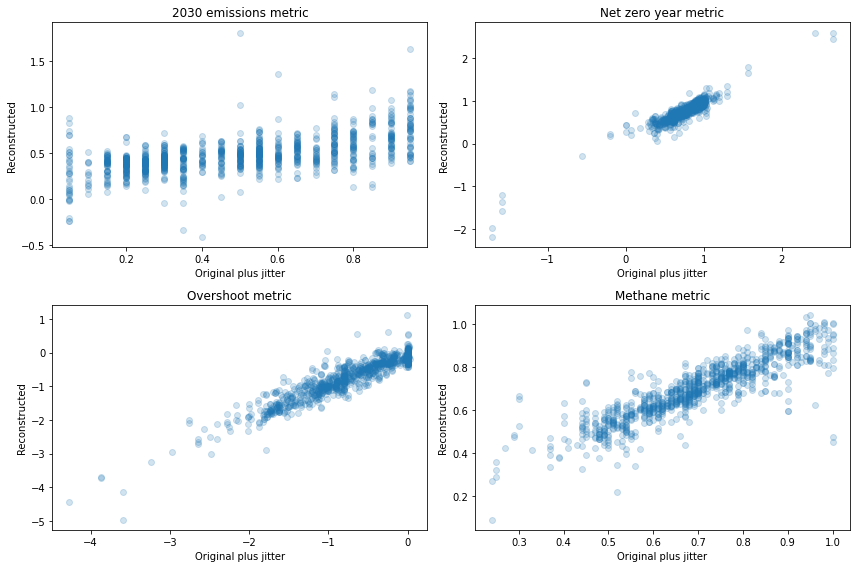

In [41]:
plt.figure(figsize=(12, 8))
corcoefs = []
titles = ["2030 emissions metric", "Net zero year metric", "Overshoot metric", "Methane metric"]
for i in range(4):
    ax=plt.subplot(2, 2, i+1)
    plt.scatter(res_test.iloc[:, i], predicted[:, i], alpha=0.2)
    plt.title(titles[i])
    plt.xlabel("Original plus jitter")
    plt.ylabel("Reconstructed")
    corcoefs.append(np.corrcoef(res_test.iloc[:, i], predicted[:, i]))
plt.tight_layout()
corcoefs

# Look for random forest methods


In [51]:
randforest_results = []
for dec in range(3, 13):
    decomposers = sklearn.decomposition.PCA(dec).fit(train.values)
    pca_train = decomposers.transform(train.values)
    pca_test = decomposers.transform(test.values)
    for pol in range(1, 10):
        poly = PolynomialFeatures(degree=pol)
        poly_train = poly.fit_transform(pca_train)
        poly_test = poly.fit_transform(pca_test)
        randforest = DecisionTreeRegressor()
        randforest = randforest.fit(pca_train, res_train)
        score = randforest.score(pca_test, res_test)
        randforest_results.append([dec, pol, score])

In [52]:
randforest_results_table = pd.DataFrame(randforest_results, columns=["PCA", "Polynomials", "score"])
randforest_results_table

,PCA,Polynomials,score
0,3,1,0.114529
1,3,2,0.075845
2,3,3,0.081764
3,3,4,0.104585
4,3,5,0.098117
...,...,...,...
85,12,5,0.507739
86,12,6,0.489688
87,12,7,0.514078
88,12,8,0.497475


In [53]:
randforest_results_table[randforest_results_table["score"]==max(randforest_results_table["score"])]

,PCA,Polynomials,score
83,12,3,0.520807


This isn't very good. Go back to PCA. 
# Add the constructed data too to see if this improves results

In [54]:
version_str = "v4"
output_dir = f"../output/{version_str}/fair/"
date_str = "2022-02-14"
temps = pd.read_csv("{}fair_output_quantiles_{}_{}.csv".format(output_dir, date_str, version_str))
fair_df = pd.read_csv('{}fair_output_raw_{}_{}.csv'.format(output_dir, date_str, version_str), index_col=0)
fair_df

,scenario,1765,1766,1767,1768,1769,1770,1771,1772,1773,...,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300
0,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.002751,0.005241,0.007940,0.012981,0.018950,0.025513,0.029475,0.030094,0.030464,...,0.312867,0.310305,0.307748,0.305196,0.302648,0.300105,0.297567,0.295033,0.292504,0.289980
1,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.003864,0.007122,0.010898,0.020395,0.031454,0.043210,0.047838,0.043892,0.041129,...,0.325923,0.322226,0.318540,0.314863,0.311197,0.307541,0.303895,0.300260,0.296635,0.293022
2,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.015027,0.025776,0.035114,0.046443,0.057942,0.069351,0.076312,0.077298,0.078463,...,0.404382,0.401322,0.398268,0.395220,0.392179,0.389145,0.386117,0.383095,0.380081,0.377073
3,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.003456,0.005529,0.007669,0.012386,0.017598,0.022956,0.024841,0.023868,0.022721,...,0.401651,0.398589,0.395533,0.392484,0.389440,0.386403,0.383372,0.380348,0.377330,0.374319
4,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.005983,0.010959,0.015759,0.022375,0.029606,0.037201,0.042308,0.042533,0.043916,...,0.276379,0.274497,0.272622,0.270754,0.268893,0.267039,0.265191,0.263351,0.261517,0.259691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,scen_2030fact1.32_nz2200_ov0_meth0.75,-0.002594,-0.003396,-0.002763,0.003357,0.011730,0.021526,0.026191,0.026982,0.025351,...,3.112862,3.112999,3.113137,3.113277,3.113418,3.113560,3.113704,3.113849,3.113995,3.114143
21596,scen_2030fact1.32_nz2200_ov0_meth0.75,0.002257,0.004585,0.007460,0.014016,0.022098,0.031179,0.036468,0.038749,0.039038,...,4.182481,4.183843,4.185191,4.186524,4.187842,4.189147,4.190437,4.191713,4.192976,4.194225
21597,scen_2030fact1.32_nz2200_ov0_meth0.75,0.005314,0.009809,0.014304,0.021737,0.030238,0.039397,0.044933,0.045437,0.045969,...,5.413546,5.415801,5.418031,5.420236,5.422417,5.424574,5.426707,5.428816,5.430902,5.432965
21598,scen_2030fact1.32_nz2200_ov0_meth0.75,0.001698,0.003474,0.005696,0.010695,0.016892,0.023899,0.028145,0.029651,0.030138,...,4.212919,4.216539,4.220138,4.223716,4.227274,4.230811,4.234328,4.237825,4.241301,4.244757


In [55]:
quantiles = [0.1,0.33,0.5,0.66,0.9]
norm_years = [str(x) for x in np.arange(2000, 2021, 1)]
fair_df_norm = fair_df.copy()
fair_df_norm.iloc[:, 1:] = (fair_df_norm.iloc[:, 1:].T + 0.85 - fair_df_norm.loc[:, norm_years].mean(axis=1)).T
norm_runs_quantiles = fair_df.groupby("scenario").quantile(quantiles)
norm_runs_quantiles = norm_runs_quantiles.reset_index()
norm_runs_quantiles = norm_runs_quantiles.rename(columns={"level_1": "quantile"})
norm_runs_quantiles

,scenario,quantile,1765,1766,1767,1768,1769,1770,1771,1772,...,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300
0,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.10,-0.000821,-0.000697,0.000245,0.005559,0.013279,0.022561,0.026562,0.025395,...,0.269397,0.266415,0.263442,0.260477,0.257522,0.254575,0.251638,0.248705,0.245513,0.242331
1,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.33,0.003000,0.005411,0.007984,0.014730,0.022152,0.030238,0.035031,0.035954,...,0.320570,0.317339,0.314115,0.310899,0.307692,0.304492,0.301300,0.298117,0.294942,0.291775
2,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.50,0.003766,0.006994,0.010551,0.017957,0.025051,0.033267,0.038770,0.039291,...,0.401214,0.397991,0.394772,0.391558,0.387670,0.383583,0.379575,0.376145,0.372719,0.369299
3,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.66,0.005610,0.010190,0.014566,0.021852,0.030457,0.039768,0.045362,0.044170,...,0.459252,0.454534,0.449826,0.445130,0.440444,0.435769,0.431105,0.426453,0.421812,0.417182
4,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.90,0.013602,0.023293,0.031828,0.042917,0.054024,0.065091,0.070097,0.067155,...,0.533576,0.530141,0.526713,0.523291,0.519876,0.516469,0.513068,0.509674,0.506288,0.502909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,scen_2030fact1.32_nz2200_ov0_meth0.75,0.10,-0.000821,-0.000697,0.000245,0.005559,0.013279,0.022561,0.026562,0.025395,...,2.962986,2.964785,2.966578,2.968365,2.970145,2.971918,2.973686,2.975447,2.977201,2.978949
4496,scen_2030fact1.32_nz2200_ov0_meth0.75,0.33,0.003000,0.005411,0.007984,0.014730,0.022152,0.030238,0.035031,0.035954,...,3.697160,3.699724,3.702277,3.704819,3.707352,3.709874,3.712386,3.714888,3.717380,3.719862
4497,scen_2030fact1.32_nz2200_ov0_meth0.75,0.50,0.003766,0.006994,0.010551,0.017957,0.025051,0.033267,0.038770,0.039291,...,3.888266,3.889871,3.891469,3.893059,3.894642,3.896217,3.897785,3.899345,3.900898,3.902444
4498,scen_2030fact1.32_nz2200_ov0_meth0.75,0.66,0.005610,0.010190,0.014566,0.021852,0.030457,0.039768,0.045362,0.044170,...,4.113569,4.114756,4.115930,4.117091,4.118240,4.119377,4.120500,4.121612,4.122712,4.123799


In [56]:
temps_py = pyam.IamDataFrame(temps)
temps_py.data

,model,scenario,region,variable,unit,year,climate_model,quantile,value
0,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.10,0.932584
1,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.33,0.949845
2,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.50,0.960186
3,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.66,0.971336
4,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.90,0.996931
...,...,...,...,...,...,...,...,...,...
1309495,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.75,World,Surface Temperature,K,2300,FaIRv1.6.4,0.10,2.890492
1309496,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.75,World,Surface Temperature,K,2300,FaIRv1.6.4,0.33,3.609135
1309497,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.75,World,Surface Temperature,K,2300,FaIRv1.6.4,0.50,3.904282
1309498,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.75,World,Surface Temperature,K,2300,FaIRv1.6.4,0.66,4.085395


In [57]:
tempsquant = temps_py.filter(year=years).timeseries().reset_index("quantile").reset_index(["region", "variable", "unit", "climate_model"], drop=True)
len(tempsquant.columns)

20

In [58]:
# Test that the data can be manipulated as expected
pcadf = pd.DataFrame(
        decomposers.transform(tempsquant),
        index=temps_py.timeseries().index
).reset_index(["region", "variable", "unit", "climate_model"])
pcadf

C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


region  \
model        scenario                                   quantile          
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25 0.10      World   
                                                        0.33      World   
                                                        0.50      World   
                                                        0.66      World   
                                                        0.90      World   
...                                                                 ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75      0.10      World   
                                                        0.33      World   
                                                        0.50      World   
                                                        0.66      World   
                                                        0.90      World   

                                                                             variable  \
model        scenario                                   quantile                        
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25 0.10      Surface Temperature   
                                                        0.33      Surface Temperature   
                                                        0.50      Surface Temperature   
                                                        0.66      Surface Temperature   
                                                        0.90      Surface Temperature   
...                                                                               ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75      0.10      Surface Temperature   
                                                        0.33      Surface Temperature   
                                                        0.50      Surface Temperature   
                                                        0.66      Surface Temperature   
                                                        0.90      Surface Temperature   

                                                                 unit  \
model        scenario                                   quantile        
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25 0.10        K   
                                                        0.33        K   
                                                        0.50        K   
                                                        0.66        K   
                                                        0.90        K   
...                                                               ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75      0.10        K   
                                                        0.33        K   
                                                        0.50        K   
                                                        0.66        K   
                                                        0.90        K   

                                                                 climate_model  \
model        scenario                                   quantile                 
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25 0.10        FaIRv1.6.4   
                                                        0.33        FaIRv1.6.4   
                                                        0.50        FaIRv1.6.4   
                                                        0.66        FaIRv1.6.4   
                                                        0.90        FaIRv1.6.4   
...                                                                        ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75      0.10        FaIRv1.6.4   
                                                        0.33        FaIRv1.6.4   
                                                        0.50        FaIRv1.6.4   
                                                        0.66        FaIRv1.6.4 

In [59]:
added_train = pd.concat([train, tempsquant])
added_train

2010      2015  \
model        scenario                                                    
IMAGE 3.0    EN_NPi2020_800                         0.924661  1.052652   
WITCH 4.6    DISCRATE_cb400_cdrno_dr4p              1.031303  1.171397   
AIM/CGE 2.2  EN_INDCi2030_800f                      0.980158  1.111952   
IMAGE 3.2    SSP1_SPA1_19I_LIRE                     1.031303  1.171397   
GRAPE-15 1.0 EMF33_Med2C_nofuel                     1.112558  1.266891   
...                                                      ...       ...   
NameVanished scen_2030fact1.32_nz2200_ov0_meth0.75  0.932460  1.008862   
             scen_2030fact1.32_nz2200_ov0_meth0.75  0.949639  1.052955   
             scen_2030fact1.32_nz2200_ov0_meth0.75  0.960060  1.089447   
             scen_2030fact1.32_nz2200_ov0_meth0.75  0.970989  1.112303   
             scen_2030fact1.32_nz2200_ov0_meth0.75  0.996720  1.155099   

                                                        2020      2025  \
model        scenario                                                    
IMAGE 3.0    EN_NPi2020_800                         1.167825  1.298816   
WITCH 4.6    DISCRATE_cb400_cdrno_dr4p              1.362117  1.455482   
AIM/CGE 2.2  EN_INDCi2030_800f                      1.240222  1.376002   
IMAGE 3.2    SSP1_SPA1_19I_LIRE                     1.310378  1.467749   
GRAPE-15 1.0 EMF33_Med2C_nofuel                     1.430107  1.613155   
...                                                      ...       ...   
NameVanished scen_2030fact1.32_nz2200_ov0_meth0.75  1.074394  1.156789   
             scen_2030fact1.32_nz2200_ov0_meth0.75  1.135372  1.236777   
             scen_2030fact1.32_nz2200_ov0_meth0.75  1.176672  1.288489   
             scen_2030fact1.32_nz2200_ov0_meth0.75  1.209621  1.335750   
             scen_2030fact1.32_nz2200_ov0_meth0.75  1.279986  1.426446   

                                                        2030      2035  \
model        scenario                                                    
IMAGE 3.0    EN_NPi2020_800                         1.381317  1.453939   
WITCH 4.6    DISCRATE_cb400_cdrno_dr4p              1.416622  1.379674   
AIM/CGE 2.2  EN_INDCi2030_800f                      1.448132  1.543967   
IMAGE 3.2    SSP1_SPA1_19I_LIRE                     1.575729  1.672901   
GRAPE-15 1.0 EMF33_Med2C_nofuel                     1.745621  1.904750   
...                                                      ...       ...   
NameVanished scen_2030fact1.32_nz2200_ov0_meth0.75  1.249725  1.348821   
             scen_2030fact1.32_nz2200_ov0_meth0.75  1.353646  1.479983   
             scen_2030fact1.32_nz2200_ov0_meth0.75  1.418095  1.560057   
             scen_2030fact1.32_nz2200_ov0_meth0.75  1.479421  1.638664   
             scen_2030fact1.32_nz2200_ov0_meth0.75  1.589992  1.772263   

                                                        2040      2045  \
model        scenario                                                    
IMAGE 3.0    EN_NPi2020_800                         1.496512  1.488544   
WITCH 4.6    DISCRATE_cb400_cdrno_dr4p              1.360900  1.337098   
AIM/CGE 2.2  EN_INDCi2030_800f                      1.629203  1.645956   
IMAGE 3.2    SSP1_SPA1_19I_LIRE                     1.721401  1.705422   
GRAPE-15 1.0 EMF33_Med2C_nofuel                     2.086931  2.252315   
...                                                      ...       ...   
NameVanished scen_2030fact1.32_nz2200_ov0_meth0.75  1.444804  1.534689   
             scen_2030fact1.32_nz2200_ov0_meth0.75  1.602527  1.713301   
             scen_2030fact1.32_nz2200_ov0_meth0.75  1.697413  1.824216   
             scen_2030fact1.32_nz2200_ov0_meth0.75  1.795402  1.939905   
             scen_2030fact1.32_nz2200_ov0_meth0.75  1.956212  2.130538   

                                                        2050      2055  \
model        scenario                                                    
IMAGE 3.0    EN_NPi2020_800                         1.47

In [60]:
def decode_scen(df):
    df["factor2030"] = [float(x[1][:4]) for x in df["scenario"].str.split("2030fact")]
    df["methane"] = [float(x[4][4:]) for x in df["scenario"].str.split("_")]
    # The numerical stability of calculations is higher when variables are all of order 1
    df["nzreduced"] = [float(x[1][:4])  / 100 - 20 for x in df["scenario"].str.split("_nz")]
    df["overshootreduced"] = [float(x[3][2:]) /10000 for x in df["scenario"].str.split("_")]
    return df
decoded_tempsquant = decode_scen(tempsquant.reset_index()).set_index(["model", "scenario"])
decoded_tempsquant

quantile      2010  \
model        scenario                                                         
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.10  0.932584   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.33  0.949845   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.50  0.960186   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.66  0.971336   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.90  0.996931   
...                                                           ...       ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75           0.10  0.932460   
             scen_2030fact1.32_nz2200_ov0_meth0.75           0.33  0.949639   
             scen_2030fact1.32_nz2200_ov0_meth0.75           0.50  0.960060   
             scen_2030fact1.32_nz2200_ov0_meth0.75           0.66  0.970989   
             scen_2030fact1.32_nz2200_ov0_meth0.75           0.90  0.996720   

                                                             2015      2020  \
model        scenario                                                         
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.005958  1.063352   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.050061  1.123176   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.086271  1.164174   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.108280  1.194066   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.150976  1.262873   
...                                                           ...       ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.008862  1.074394   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.052955  1.135372   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.089447  1.176672   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.112303  1.209621   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.155099  1.279986   

                                                             2025      2030  \
model        scenario                                                         
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.119043  1.131130   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.199352  1.235836   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.248999  1.286940   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.297183  1.348385   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.385694  1.463746   
...                                                           ...       ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.156789  1.249725   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.236777  1.353646   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.288489  1.418095   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.335750  1.479421   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.426446  1.589992   

                                                             2035      2040  \
model        scenario                                                         
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.106871  1.076146   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.231942  1.212155   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.290247  1.274513   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.339431  1.315747   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.480014  1.467707   
...                                                           ...       ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.348821  1.444804   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.479983  1.602527   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.560057  1.697413   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.638664  1.795402   
             scen_2030fac

In [61]:
res_train

,,methane,factor2030,overshootreduced,nzreduced
model,scenario,,,,
IMAGE 3.0,EN_NPi2020_800,0.55,0.792188,-0.016637,0.90
WITCH 4.6,DISCRATE_cb400_cdrno_dr4p,0.05,0.668710,-0.399550,0.65
AIM/CGE 2.2,EN_INDCi2030_800f,0.55,0.997475,-0.600000,0.60
IMAGE 3.2,SSP1_SPA1_19I_LIRE,0.35,0.743983,-1.022438,0.47
GRAPE-15 1.0,EMF33_Med2C_nofuel,0.95,1.003782,-0.314000,0.79
...,...,...,...,...,...
REMIND-MAgPIE 1.7-3.0,SMP_2C_Sust,0.30,0.631995,-0.209267,0.66
REMIND 2.1,TechCost-SSP2-B1100-windH,0.55,0.729793,-0.300882,0.66
MESSAGEix-GLOBIOM_1.2,COV_Restore_550,0.25,0.418904,-0.000055,0.50


In [62]:
added_train_res = pd.concat([res_train, decoded_tempsquant.loc[:, res_train.columns]])
added_train_res

methane  factor2030  \
model        scenario                                                     
IMAGE 3.0    EN_NPi2020_800                            0.55    0.792188   
WITCH 4.6    DISCRATE_cb400_cdrno_dr4p                 0.05    0.668710   
AIM/CGE 2.2  EN_INDCi2030_800f                         0.55    0.997475   
IMAGE 3.2    SSP1_SPA1_19I_LIRE                        0.35    0.743983   
GRAPE-15 1.0 EMF33_Med2C_nofuel                        0.95    1.003782   
...                                                     ...         ...   
NameVanished scen_2030fact1.32_nz2200_ov0_meth0.75     0.75    1.320000   
             scen_2030fact1.32_nz2200_ov0_meth0.75     0.75    1.320000   
             scen_2030fact1.32_nz2200_ov0_meth0.75     0.75    1.320000   
             scen_2030fact1.32_nz2200_ov0_meth0.75     0.75    1.320000   
             scen_2030fact1.32_nz2200_ov0_meth0.75     0.75    1.320000   

                                                    overshootreduced  \
model        scenario                                                  
IMAGE 3.0    EN_NPi2020_800                                -0.016637   
WITCH 4.6    DISCRATE_cb400_cdrno_dr4p                     -0.399550   
AIM/CGE 2.2  EN_INDCi2030_800f                             -0.600000   
IMAGE 3.2    SSP1_SPA1_19I_LIRE                            -1.022438   
GRAPE-15 1.0 EMF33_Med2C_nofuel                            -0.314000   
...                                                              ...   
NameVanished scen_2030fact1.32_nz2200_ov0_meth0.75          0.000000   
             scen_2030fact1.32_nz2200_ov0_meth0.75          0.000000   
             scen_2030fact1.32_nz2200_ov0_meth0.75          0.000000   
             scen_2030fact1.32_nz2200_ov0_meth0.75          0.000000   
             scen_2030fact1.32_nz2200_ov0_meth0.75          0.000000   

                                                    nzreduced  
model        scenario                                          
IMAGE 3.0    EN_NPi2020_800                              0.90  
WITCH 4.6    DISCRATE_cb400_cdrno_dr4p                   0.65  
AIM/CGE 2.2  EN_INDCi2030_800f                           0.60  
IMAGE 3.2    SSP1_SPA1_19I_LIRE                          0.47  
GRAPE-15 1.0 EMF33_Med2C_nofuel                          0.79  
...                                                       ...  
NameVanished scen_2030fact1.32_nz2200_ov0_meth0.75       2.00  
             scen_2030fact1.32_nz2200_ov0_meth0.75       2.00  
             scen_2030fact1.32_nz2200_ov0_meth0.75       2.00  
             scen_2030fact1.32_nz2200_ov0_meth0.75       2.00  
             scen_2030fact1.32_nz2200_ov0_meth0.75       2.00  

[8372 rows x 4 columns]

In [77]:
pca_results = []
for dec in range(5, 12):
    decomposers = sklearn.decomposition.PCA(dec).fit(added_train.values)
    pca_train = decomposers.transform(added_train.values)
    pca_test = decomposers.transform(test.values)
    for pol in range(1, 7):
        poly = PolynomialFeatures(degree=pol)
        poly_train = poly.fit_transform(pca_train)
        poly_test = poly.fit_transform(pca_test)
        regression = linear_model.LinearRegression()
        poly_model = regression.fit(poly_train, added_train_res)
        score = poly_model.score(poly_test, res_test)
        pca_results.append([dec, pol, score])

In [78]:
pca_results_table = pd.DataFrame(pca_results, columns=["PCA", "Polynomials", "score"])
pca_results_table

,PCA,Polynomials,score
0,5,1,5.333686e-02
1,5,2,2.432454e-01
2,5,3,3.700592e-01
3,5,4,4.353143e-01
4,5,5,4.775004e-01
5,5,6,4.928017e-01
6,6,1,6.505909e-02
7,6,2,3.273119e-01
8,6,3,4.610756e-01
9,6,4,5.596805e-01


In [79]:
pca_results_table[pca_results_table["score"]==max(pca_results_table["score"])]

,PCA,Polynomials,score
21,8,4,0.657035


In [80]:
# This does not represent an improvement over the smaller set of data. 